## Question 1

Create a program that enters two whole numbers and then prints out the next 30 numbers of that Fibbonacci Sequence with those two intital numbers


In [1]:
def fib(a, b):
    print(a)
    print(b)
    for i in range(0,30):
        key = a
        a = b
        b = key + b
        print(b)

In [2]:
fib(0,1)

0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229
832040
1346269


## Question 2

Create a program that accepts the following input concerning the mortgage of a house

* House price
* Mortgage rate
* Mortgage term length

From this determine the monthly mortage payment along with the total interest paid to the Bank. Graph the total amount paid and the total unpaid balance

(Assuming rate is annual and term length is given in months)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def payment(principal, rate, months):
    rm = rate / 12
    
    payment = principal * ((rm) / (1 - (1+rm)**(-months)))
    
    return payment

In [5]:
def makePayments(principal, rate, months, numPayments):
    
    balance = np.zeros(numPayments+1)
    monthlyInterest = np.zeros(numPayments+1)
    balance[0] = principal
    
    for month in range(0, numPayments):
        interest = balance[month] * rate / 12
        monthlyInterest[month+1] = interest

        R = payment(principal, rate, months)
        
        balance[month+1] = balance[month] - R + interest
        
    
    #fix numerical underflow
    #balance[numPayments+1] = 0
    return balance, monthlyInterest

In [6]:
principal = 10000
rate = .4
months = 100

balance, _ = makePayments(principal, rate, months, months)

paid = np.arange(0, months+1) * payment(principal, rate, months)
totalInterest = paid[-1] - principal

In [7]:
totalInterest

24638.029125109242

Text(0, 0.5, 'Amount in Dollars')

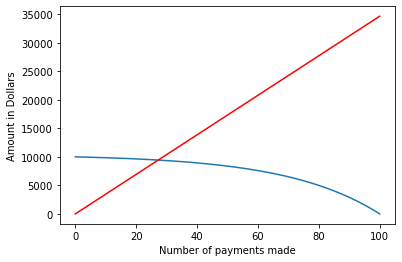

In [8]:
plt.plot(np.arange(0, months+1), balance)
plt.plot(np.arange(0, months+1), paid, c='red')
plt.xlabel("Number of payments made",)
plt.ylabel("Amount in Dollars")

### Notes on linearity

The monthly payments are static and determined at the start of the loan, so the total amount paid should be linear. The balance itself is determined dynamically as payments are made, and so shows the decaying exponential curve.

## Question 3

Create a program that accepts the following input concerning the mortgage of a house

* Mortgage Payment
* Mortgage rate
* Mortgage term length

From this determine the Value of the house along with the total interest paid to the Bank.

(assuming period of one month and rate as a yearly percentage)

In [9]:
def value(payment, rate, numMonths):
    
    principal = payment * ((1- ((1+rate/12)**(-numMonths)))/(rate/12))
    return principal

In [10]:
def interestPaid(payment, rate, numMonths):
    
    principal = value(payment, rate, numMonths)
    _, monthlyInterest = makePayments(principal, rate, numMonths, numMonths)
    
    return np.sum(monthlyInterest)

In [11]:
principal = 100000
rate = .4
months = 120
numPayments = 120

R = payment(principal, rate, months)

In [12]:
testPrincipal = value(R,rate, numPayments)
testInterest = interestPaid(R, rate, numPayments)

In [13]:
principal ==testPrincipal

True

In [14]:
totalInterest == testInterest

False

In [15]:
totalInterest

24638.029125109242

In [16]:
testInterest

307975.9396197227